# Libraries Installation:

In [52]:
pip install folium branca

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


# Workflow Discription:

bla bla bla ... (to be compleated)

# Libraries Import:

In [34]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import folium
import branca.colormap as cm
from folium.plugins import HeatMapWithTime
import folium
from folium.plugins import TimestampedGeoJson
import json
import numpy as np

import matplotlib.pyplot as plt


# The Crimes Dataset:

In [41]:
# read the CSV file into a DataFrame and show a quick preview
csv_path = "../data/NYPD_CrimeData/Preprocessed_forsquare_nyc_alligned_subset_data.csv"
crimes_df = pd.read_csv(csv_path)
print(f"Loaded {len(crimes_df)} rows and {crimes_df.shape[1]} columns")
crimes_df.head()

Loaded 430375 rows and 37 columns


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,complaint_date_start,complaint_date_end
0,92990216,08/20/2012,16:35:00,08/20/2012,16:37:00,52.0,10/08/2013,113,FORGERY,729.0,...,40.866070,-73.894382,"(40.86607022, -73.89438159)",PATROL BORO BRONX,KINGSBRIDGE ROAD,(null),UNKNOWN,E,2012-08-20 16:35:00,2012-08-20 16:37:00
1,89054204,02/07/2013,14:00:00,02/07/2013,14:45:00,49.0,02/07/2013,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,40.860440,-73.858800,"(40.86044, -73.8588)",PATROL BORO BRONX,(null),65+,WHITE,F,2013-02-07 14:00:00,2013-02-07 14:45:00
2,87307451,10/18/2012,01:50:00,10/18/2012,02:17:00,66.0,10/18/2012,106,FELONY ASSAULT,109.0,...,40.640772,-73.995594,"(40.640772, -73.995594)",PATROL BORO BKLYN SOUTH,(null),18-24,WHITE HISPANIC,F,2012-10-18 01:50:00,2012-10-18 02:17:00
3,85505531,06/27/2012,21:30:00,06/27/2012,21:35:00,78.0,06/28/2012,578,HARRASSMENT 2,637.0,...,40.672828,-73.981600,"(40.672828, -73.9816)",PATROL BORO BKLYN SOUTH,(null),65+,WHITE HISPANIC,F,2012-06-27 21:30:00,2012-06-27 21:35:00
4,85943295,07/25/2012,14:00:00,07/25/2012,14:00:00,66.0,07/26/2012,109,GRAND LARCENY,421.0,...,40.640417,-73.982921,"(40.64041694, -73.98292068)",PATROL BORO BKLYN SOUTH,(null),(null),UNKNOWN,D,2012-07-25 14:00:00,2012-07-25 14:00:00


In [32]:
crimes_df["CMPLNT_NUM"].nunique()


430375

## Columns Explaination:

**Complaint identifiers and timing**

`CMPLNT_NUM` Unique identifier for a police complaint. It represents one reported incident and is used as a primary key.

`CMPLNT_FR_DT` Start <u>date</u> of the time window during which the incident occurred.

`CMPLNT_FR_TM` Start <u>time</u> of the time window during which the incident occurred.

`CMPLNT_TO_DT` End <u>date</u> of the time window during which the incident occurred.

`CMPLNT_TO_TM` End <u>time</u> of the time window during which the incident occurred.

`RPT_DT` Date the complaint was officially reported to the police. This may be later than the occurrence date.

**Location and jurisdiction**

`ADDR_PCT_CD`
Numeric code of the NYPD precinct responsible for the incident location.

`BORO_NM`
Name of the borough where the incident occurred, for example Manhattan or Brooklyn.

`PATROL_BORO`
Patrol borough designation used internally by the NYPD for operational grouping.

`TRANSIT_DISTRICT`
Transit Bureau district code if the incident occurred in subway or transit facilities. Null for non transit incidents.

`JURIS_DESC`
Textual description of the law enforcement jurisdiction handling the case.

`JURISDICTION_CODE`
Numeric code corresponding to the jurisdiction description.

`PARKS_NM`
Name of the park if the incident occurred within a NYC park. Otherwise empty.

`HOUSING_PSA`
Police Service Area for public housing developments. Populated when the incident occurred in NYCHA housing.

`HAVEDELOPT`
Indicator of whether the incident occurred in a housing development.

**Geographic coordinates**

`X_COORD_CD`
Projected X coordinate (NYC local coordinate system).

`Y_COORD_CD`
Projected Y coordinate (NYC local coordinate system).

`latitude`
Latitude in decimal degrees.

`longitude`
Longitude in decimal degrees.

`lat_lon`
Combined latitude and longitude representation, often as a tuple or string.

**Crime classification**

`KY_CD`
High level offense classification code aligned with penal law categories.

`OFNS_DESC`
Text description of the offense category.

`PD_CD`
Internal NYPD offense code identifying the specific crime type.

`PD_DESC`
Textual description corresponding to PD_CD.

`LAW_CAT_CD`
Legal classification of the offense, typically Felony, Misdemeanor, or Violation.

`CRM_ATPT_CPTD_CD`
Indicates whether the crime was completed or only attempted.

**Location context**

`LOC_OF_OCCUR_DESC`
Description of where the incident occurred relative to a building, such as inside or in front of premises.

`PREM_TYP_DESC`
Type of premises where the incident occurred, for example street, apartment, or store.

`STATION_NAME`
Name of the transit station if the incident occurred within a subway or train station.

**Suspect information**

`SUSP_AGE_GROUP`
Age group of the suspect, reported in ranges.

`SUSP_RACE`
Race of the suspect as recorded by the reporting officer.

`SUSP_SEX`
Sex of the suspect.

**Victim information**

`VIC_AGE_GROUP`
Age group of the victim.

`VIC_RACE`
Race of the victim.

`VIC_SEX`
Sex of the victim.

**Derived or processed fields**

`complaint_date_start`
A derived or cleaned date field representing the start of the complaint occurrence window, often created during preprocessing.

## Analizing and cleansing:

In [3]:
crimes_df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'complaint_date_start',
       'complaint_date_end'],
      dtype='object')

In [4]:
print(crimes_df.isnull().sum().sort_values(ascending=False))
station_name_count = (crimes_df["STATION_NAME"] == "(null)").sum()
unknown_count = (crimes_df["VIC_RACE"] == "UNKNOWN").sum()
print(f"Number of 'UNKNOWN' entries in 'VIC_RACE': {unknown_count} and null STATION_NAME entries: {station_name_count}")
the_total_rows = len(crimes_df)
print(f"Total rows: {the_total_rows}")

TRANSIT_DISTRICT        421684
PD_CD                      360
ADDR_PCT_CD                 32
Lat_Lon                      1
Y_COORD_CD                   1
X_COORD_CD                   1
Latitude                     1
Longitude                    1
CMPLNT_TO_TM                 0
CMPLNT_NUM                   0
CMPLNT_TO_DT                 0
CMPLNT_FR_TM                 0
CMPLNT_FR_DT                 0
BORO_NM                      0
LOC_OF_OCCUR_DESC            0
KY_CD                        0
RPT_DT                       0
OFNS_DESC                    0
PD_DESC                      0
CRM_ATPT_CPTD_CD             0
LAW_CAT_CD                   0
HOUSING_PSA                  0
HADEVELOPT                   0
PARKS_NM                     0
JURISDICTION_CODE            0
JURIS_DESC                   0
PREM_TYP_DESC                0
SUSP_RACE                    0
SUSP_AGE_GROUP               0
SUSP_SEX                     0
PATROL_BORO                  0
STATION_NAME                 0
VIC_AGE_

In [5]:
# drop columns (ignore if they don't exist)
crimes_df.drop(columns=['STATION_NAME', 'TRANSIT_DISTRICT'], inplace=True, errors='ignore')

In [6]:
df = crimes_df.copy()

df["date"] = pd.to_datetime(df["complaint_date_start"], errors="coerce").dt.date
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")
df = df.dropna(subset=["date", "Latitude", "Longitude", "CMPLNT_NUM"])

df["lat_bin"] = df["Latitude"].round(3)
df["lon_bin"] = df["Longitude"].round(3)

daily_loc = (
    df.groupby(["date", "lat_bin", "lon_bin"], as_index=False)
      .agg(crimes=("CMPLNT_NUM", "nunique"))
      .rename(columns={"lat_bin": "Latitude", "lon_bin": "Longitude"})
)

daily_loc["crimes"] = daily_loc["crimes"].astype(float)
max_crimes = daily_loc["crimes"].max()

daily_loc["crimes_norm"] = daily_loc["crimes"] / max_crimes

In [7]:
dates = sorted(daily_loc["date"].unique())

heat_data = [
    daily_loc.loc[
        daily_loc["date"] == d,
        ["Latitude", "Longitude", "crimes_norm"]
    ].values.tolist()
    for d in dates
]

global_max = float(daily_loc["crimes_norm"].max())

In [8]:
max_crimes = float(daily_loc["crimes"].max()) if len(daily_loc) else 1.0

features = []
for _, row in daily_loc.iterrows():
    crimes = float(row["crimes"])
    t = row["date"].strftime("%Y-%m-%d")

    features.append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [float(row["Longitude"]), float(row["Latitude"])]
        },
        "properties": {
            "time": t,
            "crimes": crimes,
            "popup": f"Date: {t}<br>Crimes: {int(crimes)}"
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

In [9]:
# Ensure types
dl = daily_loc.copy()
dl["date"] = pd.to_datetime(dl["date"], errors="coerce")
dl = dl.dropna(subset=["date", "Latitude", "Longitude", "crimes"])

max_crimes = float(dl["crimes"].max()) if len(dl) else 1.0

features = []
for _, row in dl.iterrows():
    crimes = float(row["crimes"])
    t = row["date"].strftime("%Y-%m-%d")

    # radius scaled 2..12 approximately
    radius = 2 + 10 * (crimes / max_crimes)

    features.append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [float(row["Longitude"]), float(row["Latitude"])]
        },
        "properties": {
            "time": t,
            "popup": f"Date: {t}<br>Crimes: {int(crimes)}",
            "style": {"color": "blue"},
            "icon": "circle",
            "iconstyle": {
                "fillColor": "blue",
                "fillOpacity": 0.6,
                "stroke": True,
                "radius": radius
            }
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

In [10]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles="CartoDB positron")

TimestampedGeoJson(
    data=geojson,
    period="P1D",
    add_last_point=False,
    auto_play=False,
    loop=False,
    max_speed=10,
    loop_button=True,
    date_options="YYYY-MM-DD",
    time_slider_drag_update=True,
    duration="P1D"
).add_to(m)

m.fit_bounds([
    [dl["Latitude"].min(), dl["Longitude"].min()],
    [dl["Latitude"].max(), dl["Longitude"].max()]
])

m.save("nyc_crime_timed_geojson.html")

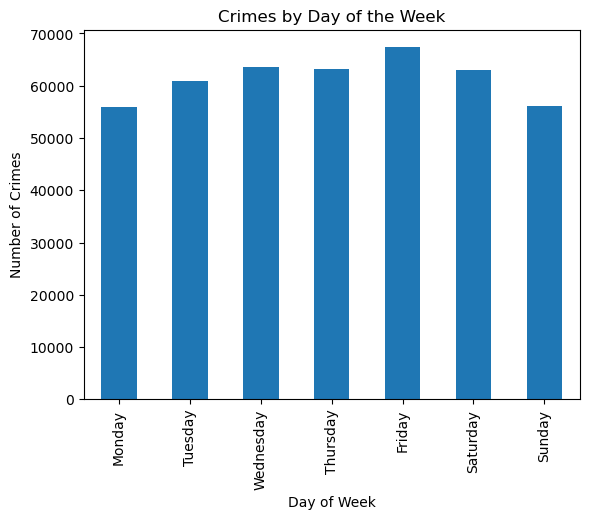

In [35]:
df = crimes_df.copy()
df["date"] = pd.to_datetime(df["complaint_date_start"], errors="coerce")
df = df.dropna(subset=["date"])

dow = (
    df["date"]
    .dt.day_name()
    .value_counts()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

plt.figure()
dow.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Day of the Week")
plt.show()

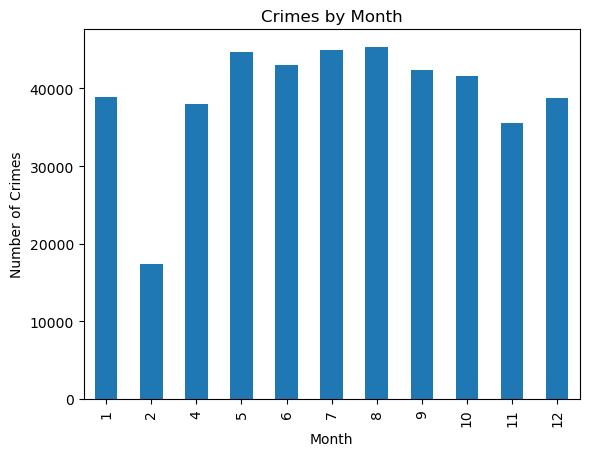

In [36]:
month = df["date"].dt.month.value_counts().sort_index()

plt.figure()
month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Month")
plt.show()

C:\Users\nadda\AppData\Local\Temp\ipykernel_24932\876013029.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["CMPLNT_FR_TM"], errors="coerce").dt.hour


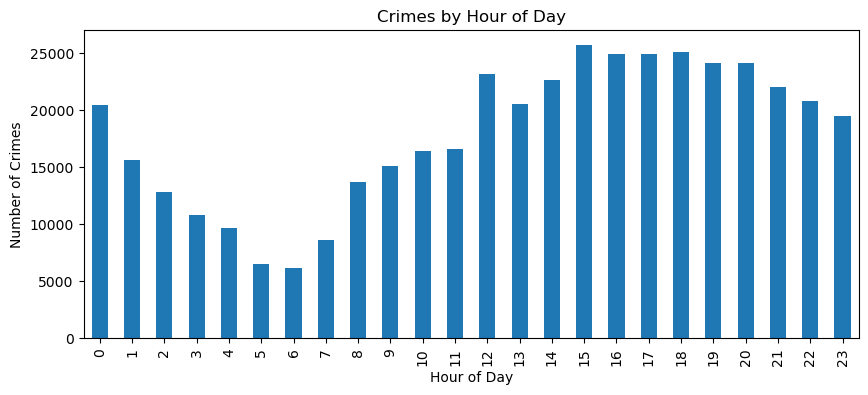

In [40]:
df["hour"] = pd.to_datetime(df["CMPLNT_FR_TM"], errors="coerce").dt.hour
hour = (
    df.dropna(subset=["hour"])
      .groupby("hour")
      .size()
      .reindex(range(24), fill_value=0)
)

plt.figure()
hour.plot(kind="bar", figsize=(10, 4))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Hour of Day")
plt.show()


# NYC Checkins Dataset

## combining data of category mapping and checkins with crimes

In [11]:
csv_path = "../data/NYC_checkins/raw/category_mapping.csv"
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows and {df.shape[1]} columns")
df.head()

Loaded 251 rows and 2 columns


,Fine Category,Broad Category
0,American Restaurant,Food & Dining
1,Mexican Restaurant,Food & Dining
2,Korean Restaurant,Food & Dining
3,French Restaurant,Food & Dining
4,Seafood Restaurant,Others


In [22]:
csv_path = "../data/NYC_checkins/raw/checkins_with_crimes.csv"
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows and {df.shape[1]} columns")
df.head()

Loaded 227428 rows and 13 columns


,user_id,poi_id,poi_category_id,poi_category_name,latitude,longitude,timezone_offset,utc_time,local_time,crimes,violations,misdemeanors,felonies
0,1,0,4bf58dd8d48988d1ce941735,Seafood Restaurant,40.781558,-73.975792,-240,2012-04-04 23:31:31+00:00,2012-04-04 19:31:31+00:00,3,0,3,0
1,1,1,4bf58dd8d48988d157941735,American Restaurant,40.784018,-73.974524,-240,2012-04-07 17:42:24+00:00,2012-04-07 13:42:24+00:00,13,2,10,1
2,1,2,4bf58dd8d48988d1f1931735,General Entertainment,40.739398,-73.993210,-240,2012-04-08 18:20:29+00:00,2012-04-08 14:20:29+00:00,40,2,26,12
3,1,3,4bf58dd8d48988d14e941735,American Restaurant,40.785677,-73.976498,-240,2012-04-08 20:02:10+00:00,2012-04-08 16:02:10+00:00,21,3,12,6
4,1,4,4bf58dd8d48988d143941735,Breakfast Spot,40.719929,-74.008532,-240,2012-04-09 16:20:52+00:00,2012-04-09 12:20:52+00:00,12,2,3,7


In [29]:
print(df['user_id'].nunique())

1083


In [13]:
csv_path = "../data/NYC_checkins/extra_data_to_combine/holidays_2012.csv"
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows and {df.shape[1]} columns")
df.head()

Loaded 49 rows and 5 columns


,Date,Day,Holiday_Name,Region/Category,Context/Note
0,2012-01-01,Sunday,New Year's Day,NYC/Federal,Observed Monday Jan 2
1,2012-01-16,Monday,Martin Luther King Jr. Day,NYC/Federal,3rd Monday in Jan
2,2012-02-04,Saturday,Mawlid (Prophet's Birthday) Eve,Muslim,Observance starts at sundown
3,2012-02-05,Sunday,Mawlid (Prophet's Birthday),Muslim,Main observance day
4,2012-02-07,Tuesday,Tu BiShvat Eve,Jewish,New Year for Trees (at sundown)


In [14]:
category_mapping_path = "../data/NYC_checkins/raw/category_mapping.csv"
category_mapping_df = pd.read_csv(category_mapping_path)
checkins_with_crimes_path = "../data/NYC_checkins/raw/checkins_with_crimes.csv"
checkins_with_crimes_df = pd.read_csv(checkins_with_crimes_path)

In [15]:
joined_df = checkins_with_crimes_df.merge(
    category_mapping_df,
    how="inner",
    left_on="poi_category_name",
    right_on="Fine Category"
)
joined_df = joined_df.drop(columns=["Fine Category"])
joined_df.head()

,user_id,poi_id,poi_category_id,poi_category_name,latitude,longitude,timezone_offset,utc_time,local_time,crimes,violations,misdemeanors,felonies,Broad Category
0,1,0,4bf58dd8d48988d1ce941735,Seafood Restaurant,40.781558,-73.975792,-240,2012-04-04 23:31:31+00:00,2012-04-04 19:31:31+00:00,3,0,3,0,Others
1,1,1,4bf58dd8d48988d157941735,American Restaurant,40.784018,-73.974524,-240,2012-04-07 17:42:24+00:00,2012-04-07 13:42:24+00:00,13,2,10,1,Food & Dining
2,1,2,4bf58dd8d48988d1f1931735,General Entertainment,40.739398,-73.993210,-240,2012-04-08 18:20:29+00:00,2012-04-08 14:20:29+00:00,40,2,26,12,Arts & Entertainment
3,1,3,4bf58dd8d48988d14e941735,American Restaurant,40.785677,-73.976498,-240,2012-04-08 20:02:10+00:00,2012-04-08 16:02:10+00:00,21,3,12,6,Food & Dining
4,1,4,4bf58dd8d48988d143941735,Breakfast Spot,40.719929,-74.008532,-240,2012-04-09 16:20:52+00:00,2012-04-09 12:20:52+00:00,12,2,3,7,Food & Dining


In [16]:
joined_df.columns

Index(['user_id', 'poi_id', 'poi_category_id', 'poi_category_name', 'latitude',
       'longitude', 'timezone_offset', 'utc_time', 'local_time', 'crimes',
       'violations', 'misdemeanors', 'felonies', 'Broad Category'],
      dtype='object')

In [17]:
grouped_df = (
    joined_df
    .groupby(["latitude", "longitude"], as_index=False)
    .agg({
        "poi_id": "nunique",
        'poi_category_id': "nunique", 
        "poi_category_name": "first",
        "Broad Category": "first",
        'crimes': "max"
    })
)

In [18]:
grouped_df

,latitude,longitude,poi_id,poi_category_id,poi_category_name,Broad Category,crimes
0,40.550852,-73.931293,1,1,Beach,Outdoors & Recreation,0
1,40.556602,-73.913372,1,1,Bar,Food & Dining,2
2,40.557295,-73.911548,1,1,Beach,Outdoors & Recreation,2
3,40.558871,-73.923459,1,1,Office,Home & Family,2
4,40.559423,-73.926507,1,1,Other Great Outdoors,Outdoors & Recreation,0
...,...,...,...,...,...,...,...
42976,40.983151,-74.010437,1,1,Bank,Government & Community,0
42977,40.983611,-74.015588,1,1,Medical Center,Health & Beauty,0
42978,40.983991,-73.978946,1,1,Pizza Place,Food & Dining,0
42979,40.987646,-73.988880,1,1,Home (private),Home & Family,0


In [19]:
df = grouped_df.copy()

# Center of NYC
nyc_center = [40.7128, -74.0060]

m = folium.Map(location=nyc_center, zoom_start=11, tiles="CartoDB positron")

# HeatMap expects [lat, lon, weight]
heat_data = df[["latitude", "longitude", "crimes"]].dropna().values.tolist()

HeatMap(
    heat_data,
    radius=12,
    blur=10,
    min_opacity=0.3,
    max_zoom=13
).add_to(m)

m.save("nyc_checkins_crime_heatmap.html")

In [20]:
df = grouped_df.copy()

nyc_center = [40.7128, -74.0060]
m = folium.Map(location=nyc_center, zoom_start=11, tiles="CartoDB positron")

# Create a green -> red color scale
vmin, vmax = float(df["crimes"].min()), float(df["crimes"].max())
colormap = cm.LinearColormap(
    colors=["green", "yellow", "red"],
    vmin=vmin,
    vmax=vmax
)
colormap.caption = "Crimes per location"
colormap.add_to(m)

for _, row in df.iterrows():
    crimes = float(row["crimes"])
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=colormap(crimes),
        fill=True,
        fill_color=colormap(crimes),
        fill_opacity=0.8,
        popup=f"Crimes: {int(crimes)}<br>Category: {row['poi_category_name']}"
    ).add_to(m)

m.save("nyc_checkins_crime_circles.html")
